# Introduction to Function-Valued Trait Analysis
Anika Watson

## Introduction
### Throwing out the Data with the Bathwater

Despite our best attempts to conduct thorough studies, many biologists are unwittingly throwing away valuable data on a regular basis. In the coming years, as technology improves and data are produced in greater and greater quantities this is likely to evolve into a much larger issue (Stinchcombe et al., 2012). One might expect that these productive technological advances will bring with them incredible computing power eliminating the need to worry about missing important features. This, however, is not the case as even the “smartest” computer needs to know what to look for. Thus, the question of how to distill informative trends out of the data without losing valuable information or making unfounded assumptions, remains. Fortunately, we biologists do not need to answer this question alone. A promising approach has emerged from the field of statistics that hinges on the fact that many biological traits are traditionally described by single measurements when they are, in fact, functions. 

To explore what we mean by this, let us consider ambient light spectra. When biologists wish to compare the spectra of light availalbe, we often distill these spectra down to a single number, such as the peak wavelength (the wavelength of light that is most abundant) (eg. Veen et al., 2016), or the median value representing the average wavelength of all the photons present. Figure 1 shows three hypothetical absorbance spectra. Note that, in the first case (Figure 1 A), the peak wavelength, and the average wavelength, are the same so biologists using both metrics would agree on a number to represent this spectrum. While successfully communicating information about the center of the spectrum and the peak, this simplification ignores information about the width of the peak. Figure 1 B shows an example of a spectrum that is skewed such that the peak wavelength no longer agrees with the average. In Figure 1 C there are clearly two peaks which cannot be represented by either reporting the taller of the peaks, or the average wavelength. Treating these spectra as functions would allow us to compare them to other functions, such as the absorbance of light by an animal's eye, and by simplifying the curves we forfeit the ability to make such comparisons.

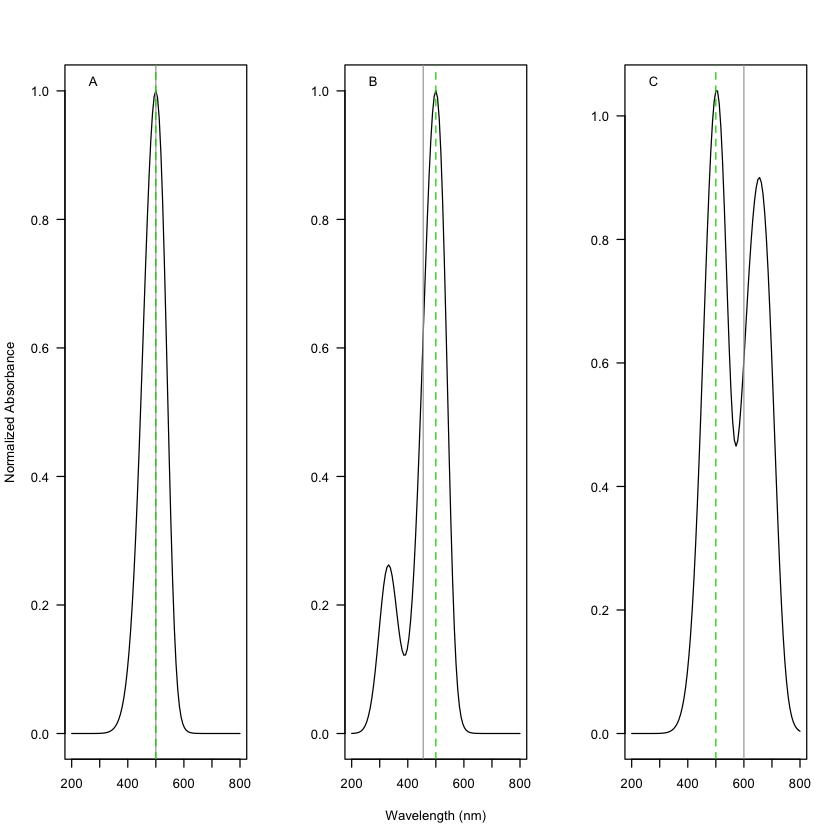

In [8]:
library("scales")
library(shiny)

#opsin labels and Lambda_max values for their sensitivity curves
opsins <- c("short wavelength", "long wavelenght")
lmax <- c(480., 620.)


nOpsin <- length(opsins) #number of opsins

nCoeff <- 2  #number of coefficients in Hermite series expansion

#make a vector of independent biological functions of the visual system that are 
#assumed to be the target of selection
functions <- c("foton capture efficiency", "peak sensitivity", "sensitivity range")
nFunc <- length(functions)


la <- 200
lb <- 800

#here "x" replaces the lowercase lambda in the Mathematica code,
#and "L" replaces the capilal lambda
Aband1 <- function(x,L) {
  a <- (0.8795 + 0.0459*exp(-(L - 300.)^(2/11940.)))
  1.0/(exp(69.7*(a - (L/x))) + exp(28.*(0.922 - (L/x))) + 
         exp(-14.9*(1.104 - (L/x))) + 0.674)
}

#as before, "x" replaces the lowercase lambda in the Mathematica code,
#and "L" replaces the capilal lambda, 
#also, "m" replaces mu and b replaces beta
Bband1 <- function(x,L) {
  m <- 189. + 0.315*L
  b <- -40.5 + 0.195*L
  0.26*exp(-((x - m)/b)^2)
}

par(mfrow=c(1, 3))

#Let's plot the opsin spcrta as a combinations of Aband1 and Bband1
curve(Aband1(x, 500), la, lb, 101, las=1, ylab="Normalized Absorbance", xlab="")
abline(v=500, col = "darkgrey")
abline(v=500, col = 3, lty = 2)
legend("topleft", "A", bty = "n")

curve(Aband1(x, 500) + Bband1(x, 450), la, lb, 101,  add = FALSE, las=1, ylab="", xlab="Wavelength (nm)")
abline(v=455, col = "darkgrey")
abline(v=500, col = 3, lty = 2)
legend("topleft", "B", bty = "n")

curve(0.9*Aband1(x, 655) + Aband1(x, 500), la, lb, 101,  add = FALSE, las=1, ylab="", xlab="")
abline(v=600, col = "darkgrey")
abline(v=500, col = 3, lty = 2)
legend("topleft", "C", bty = "n")

If the idea of treating biological traits as functions, and comparing them to each other sounds daunting to you, you are not alone. The perceived mathematical sophistication and difficulty of this method is one of the main reasons that biologists have largely been hesitant to adopt it. Fortunately, even simple applications of it can have significant advantages over traditional analyses (Griswold et al., 2008; Baker et al., 2015). This entry-level guide aims to act as a starting point for biologists with some experience in R and a basic understanding of statistics, who wish to explore this functional new terrain. The paper is driven by detailed examples including thorough R code in order to be as accessible as possible. 

##History
###How it all started

This approach first appeared in literature as far back as 1989 when Mark Kirkpatrick and David Lofsvold noticed that many evolutionarily important traits could be described as functions and suggested that treating these traits as functions could provide biological insights (Kirkpatrick & Lofsvol, 1989). This observation caught the eyes of breeders, biologists and statisticians, gaining support from various fields as scientists realized just how widespread these “function-valued” traits are. According to a paper by the Function-valued Traits Working Group, “A function-valued trait is any trait that changes in response to another variable” (Stinchcombe et al., 2012), so given that this includes any traits that change with respect to time, gene expression, or environmental conditions there is no shortage of examples. Size can be thought of as a function of age, fur length, as a function of ambient temperature, and so on. In a 1998 article, geneticist and statistician W.G. Hill predicted that function-valued methods may eventually replace traditional methods in evolutionary biology (Griswold et al., 2008). The term "function-valued traits" was coined the very next year (Pletcher and Geyer, 1999). 

##Advantages
###What's All the Fuss about?

Statistically, the function-valued perspective boasts “efficiency, flexibility, and enhanced power" (Stinchcombe et al., 2012). Of all the complements function-valued analysis receives, "enhanced power" seems to come up most. To unpack why function-valued analysis has increased power, recall that having greater “power” means that function-valued analyses are less likely to accept a false null hypothesis (Type II error) than multivariate approaches. To gain some intuition for this consider that a permutation randomly assigns each measured value to one of the subjects without knowing or caring about the order and spacing of the data points. As a result, some of the permutations will lie outside of the realm of physical possibility (an individual squirrel cannot, for instance, go from 15 cm in length, to 45 cm in length, and then down to 5 cm in length over the span of six days). Yet outlandish, impossible, permutations will still impact the analysis, perhaps making an observed variation between two populations appear negligible, when it is actually very dramatic within physical constraints. The function-valued approach *does* take into account the ordering and spacing of data because functions are sensitive to the locations of points along their curves. Another reason that function-valued analysis has increased power is that functions can pluck out trends in noisy data where traditional methods get lost in a sea of noise (Stinchcombe et al. 2012). Remarkably, Griswold et al. found that in all cases they examined, “the gain in power of the […] function-valued approach over the multivariate approach did not appear to come at the cost of an elevated Type I error rate” (Griswold et al., 2008) meaning that function-valued analyses reduce false negatives without increasing false positives. 

Another advantage of function-valued analysis is that it does not care which points the researcher selected to sample their data. One can just as easily approximate a function that fits the growth of a plant if its height is measured on odd days, as if its height were to be measured on even days. This allows for comparison between data sets with different numbers of samples, and whose samples were taken at different points, opening up worlds of possibilities to gain more insight into existing data by comparing or seemingly disparate datasets.

Despite these clear advantages, and Hill's prediction, function-valued trait analysis still hasn't taken off. A quick online search for "function-valued traits" returns 7 results between 1990 and 2000, 236 results between 2000 and 2010, and 370 since 2010 (2010-March 2018). Far from holding a monopoly over the thousands of evolutionary biology, papers published each year. W.G. Hill’s prediction is far from becoming a reality. The "Function-valued Traits Working Group," listed two major limitations in 2012 that have yet to be thoroughly addressed. Firstly, the cost of additional measurements required to estimate functions presents a challenge, and secondly a general unfamiliarity with function-valued analyses is limiting its uptake by scientists (Stinchcombe et al., 2012). Other drawbacks of this method include the fact that error calculations for function-valued analyses are still poorly developed, and that there are no clear-cut rules for selecting a basis functions, or for determining how well the approximating function should fit the data (Griswold et al., 2008; Hernandez et al., 2015). Despite outstanding questions, the Function-valued Traits Working Group remains optimistic writing that, “although challenges remain, as inherently functional data become more common, functional analyses become necessary, rather than just a promising idea” (Stinchcombe et al. 2012).

A commentary in the New Phytologist, published in 2015, described three distinct methods of function-valued analysis. The first is to assume a common template function, and measure deviation from that function. The second is to, once again, assume a template function, and then fit this function to the data by tuning the inputs of the function. The third approach is to select a base function, take polynomials for instance, and add up varying amounts of these basis functions (x, x^2^, x^3^, etc.) to approximate the data (Hernandez, 2015). In this guide we will focus on the latter because it does not require one to assume an underlying function or common template and are thus widely applicable.

## Examples
### Time to Get Down and Dirty

As daunting as it may seem, function-valued trait analysis may be more familiar than it seems. Have you ever hit "add trendline" and "display equation on chart" in excel? If yes, then you've already done some simple function-valued analysis. Figure 2 is an example of just that, showing data from a university freshman level biology lab (designed for non-biology majors) in which students measure the volume of CO~2~ produced through yeast metabolism, and use this data to calculate the rate of metabolism. The premise of this lab is, at its foundation, the simplest example of function-valued analysis (Figure 2).

Warning message in as.numeric(as.vector(Yeast[1, ])) - serr2:
“longer object length is not a multiple of shorter object length”Warning message in as.numeric(as.vector(Yeast[1, ])) + serr2:
“longer object length is not a multiple of shorter object length”

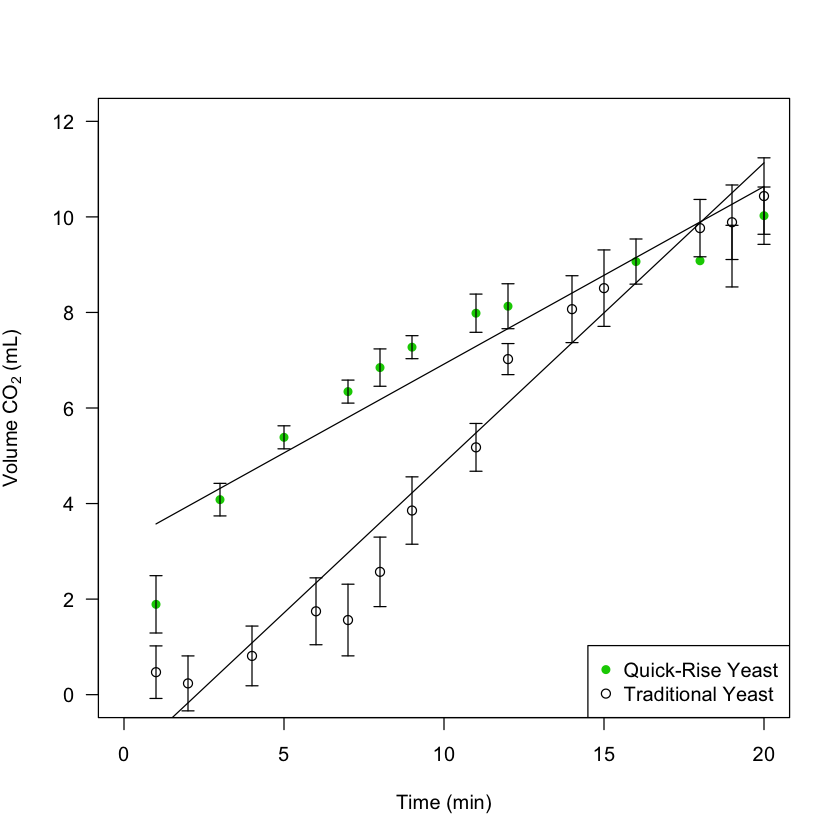

In [9]:
RcticG <- function(a, k, g, x) {
  0.75+10*(a*exp(-exp(-k*(x-g)))-exp(-exp(-k*(-g))))
}
Time <- seq(from = 1, to = 20, by = 1)
inp <- seq(from = 1, to = 20, by = 1)
a1 <- 1
k1 <- 0.31
g1 <- 10
Length <- data.frame(matrix(NA, nrow=1, ncol=20))
Mono1akg <- data.frame(matrix(NA, nrow=100, ncol=3))
set.seed(1235)
MonoError <- rnorm(n=20, mean=0, sd=0.4) #measurement error
for (l in 1:20){
  Length[1,l] <- RcticG(a1, k1, g1, (l)) + MonoError[l]
}
a2 <- 1.2
k2 <- 0.19
g2 <- 1
Yeast <- data.frame(matrix(NA, nrow=1, ncol=20))
Mono2akg <- data.frame(matrix(NA, nrow=100, ncol=3))
set.seed(1234)
MonoError <- rnorm(n=20, mean=0, sd=0.24) #measurement error
for (l in 1:20){
  Yeast[1,l] <- RcticG(a2, k2, g2, (l)) + MonoError[l]
}

serr <- as.vector(c(0.55, 0.575, NA, 0.625, NA, 0.7, 0.75, 0.7275, 0.705, NA, 0.5, 0.325, NA, 0.7, 0.8, NA, NA, 0.6, 0.78, 0.8))

serr2 <- as.vector(c(0.6, NA, 0.340824829, NA, 0.240824829, NA, 0.240824829, 0.390824829, 0.240824829, NA, 0.4, 0.470412415, NA, NA, NA, 0.472474487, NA, NA, 0.644948974))

YeastModel1 <- lm(as.numeric(as.vector(Length[1,])) ~ poly(x = Time, n = 1))

predicted.intervals1 <- predict(YeastModel1, data.frame(x=Time), interval='confidence', level=0.99)

YeastModel2 <- lm(as.numeric(as.vector(c(1.890646, NA, 4.082029, NA, 5.386328, NA, 6.343217, 6.845882, 7.272959, NA, 7.984215, 8.130051, NA, NA, NA, 9.064883, NA, 9.081678, NA, 10.02532))) ~ poly(x = Time, n = 1))



predicted.intervals2 <- predict(YeastModel2, data.frame(x=Time), interval='confidence', level=0.99)

plot(y = c(0.4708057, 0.2361236, NA, 0.8109361, NA, 1.744958, 1.562145, 2.570341, 3.853945, NA, 5.176361, 7.023459, NA, 8.068568, 8.508371, NA, NA, 9.765098, 9.887779, 10.43612), x = Time, ylim = c(0, 12), xlim = c(0, 20), ylab = expression('Volume CO'[2]* ' (mL)'), xlab = "Time (min)", las = 1)
points(y = c(1.890646, NA, 4.082029, NA, 5.386328, NA, 6.343217, 6.845882, 7.272959, NA, 7.984215, 8.130051, NA, NA, NA, 9.064883, NA, 9.081678, NA, 10.02532), x = Time, pch = 16, col = 3)

arrows(Time, as.numeric(as.vector(Length[1,]))-serr, Time, as.numeric(as.vector(Length[1,]))+serr, length=0.05, angle=90, code=3)

arrows(Time, as.numeric(as.vector(Yeast[1,]))-serr2, Time, as.numeric(as.vector(Yeast[1,]))+serr2, length=0.05, angle=90, code=3)

lines(inp,predicted.intervals1[,1],col='black', lwd=1, xlim=c(0,10))

lines(inp,predicted.intervals2[,1],col='black', lwd=1, xlim=c(0,10))

legend("bottomright",c("Quick-Rise Yeast", "Traditional Yeast"), 
       col = c(3, "black"), pch = c(16, 1))

Notice in Figure 2 that the data from this lab is sparse, and irregular. This is to be expected from students' first attempts to conduct a biological experiment and simply cannot be avoided if the instructor ever wishes to see the sun again! Thus, it is important to select a metnod of analysis that is immune to drastic data colllection mishaps. Even the simplest function-values analysis of fitting a straight line of best fit, provides this foolproof approach. Where a t-test would fail to surmount gaps in the data, functions do not care if points are equally spaces and approximate the curve just as easily.

While the linear approximation approach is clearly superior to a full-blown t-test, students often complin that these stright lines of best fit do not represent the data very well. As tempting as it is we must refrain from diving into Excel and testing out every available trendline regression. Without knowledge of the underlying function (is the growth exponential? logarithmic?), we may not want to guess at a more complicated alternative to the straight line. Fortunately, with basis functions we don't have to. We may, instead, use a non-parametric method of function-valued traits that does not assume any particular underlying function.

In order to clearly illustrate this method, we have created a sample dataset comprised of computer generated lengths of R-ctic grayling. This dataset has both random individual variance, and random measurement error and is composed of two populations, fluvial R-ctic grayling (those that live exclusively in rivers), and adfluvial R-ctic grayling (those that live in rivers and lakes). See Figure 3 for a plot of the fluvial R-ctic grayling data.

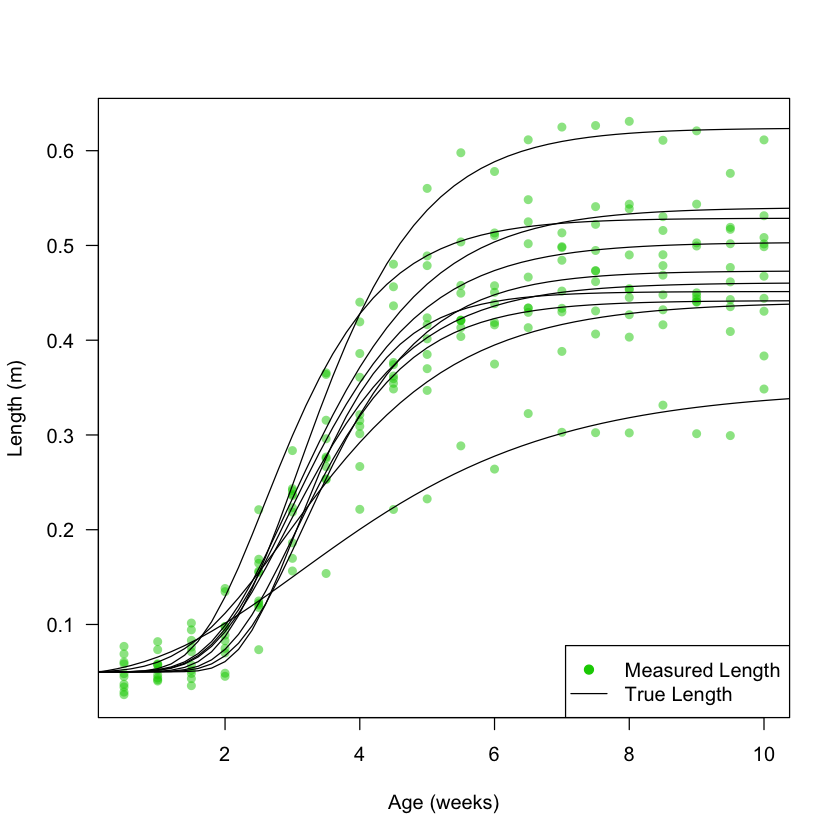

In [10]:
RcticG <- function(a, k, g, x) {
  0.05+0.4*(a*exp(-exp(-k*(x-g)))-exp(-exp(-k*(-g))))
}
inp <- seq(from = 0.5, to = 10, by = 0.5)
a1 <- 1
k1 <- 1
g1 <- 3
RcticG1 <- data.frame(matrix(NA, nrow=10, ncol=20))
Mono1akg <- data.frame(matrix(NA, nrow=100, ncol=3))
for (i in 1:10) {
  set.seed(1234*i)
  MonoError <- rnorm(n=20, mean=0, sd=0.02) #measurement error
  IndiDev <- rnorm(n=3, mean=0, sd=0.2) #the individual's deviation from the pop. av.
  for (l in 1:20){
    RcticG1[i,l] <- RcticG((a1+IndiDev[1]), (k1+IndiDev[2]), (g1+IndiDev[3]), (l/2)) + MonoError[l]
  }
  Mono1akg[i,1] <- a1+IndiDev[1]
  Mono1akg[i,2] <- k1+IndiDev[2]
  Mono1akg[i,3] <- g1+IndiDev[3]
}

matplot(y = t(RcticG1), x = inp, type = 'p', lty = 1, pch = 16, main = NULL, ylab = "Length (m)", xlab = "Age (weeks)", las = 1, col = alpha(3, 0.5))
curve(RcticG(Mono1akg[1,1], Mono1akg[1,2], Mono1akg[1,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[2,1], Mono1akg[2,2], Mono1akg[2,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[3,1], Mono1akg[3,2], Mono1akg[3,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[4,1], Mono1akg[4,2], Mono1akg[4,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[5,1], Mono1akg[5,2], Mono1akg[5,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[6,1], Mono1akg[6,2], Mono1akg[6,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[7,1], Mono1akg[7,2], Mono1akg[7,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[8,1], Mono1akg[8,2], Mono1akg[8,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[9,1], Mono1akg[9,2], Mono1akg[9,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono1akg[10,1], Mono1akg[10,2], Mono1akg[10,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
legend("bottomright",c("Measured Length", "True Length"), 
       col = c(3, "black"), pch = c(19, NA), lwd = c(NA, 1), lty = c(1, 1))

Now that we have data we can fit various models to them. Let's begin by fitting a series of polynomials to the data in a process called polynmial regression. For simplicity, we will begin by focusing on one individual, then we will scale up to one population, and finally, we will compare two populations of R-ctic Grayling. 

We can name the first individual from the first population, `RcticG1ind1` so that it will be easy to keep track of. See Figure 4 for `RcticG1ind1`'s length data.

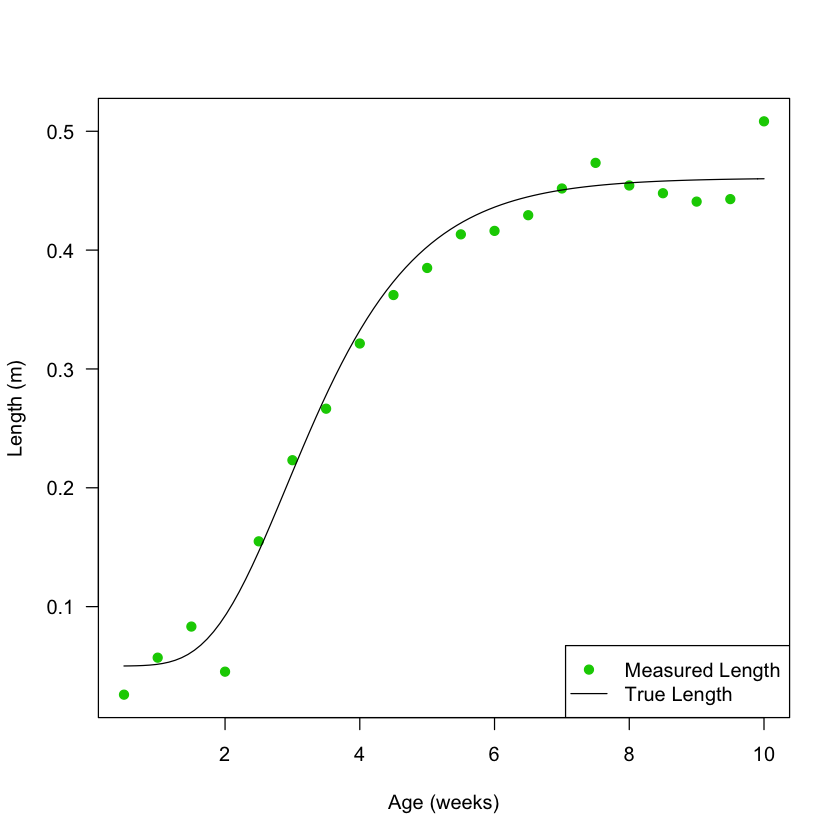

In [7]:

RcticG1ind1 <- rep(NA, 20)
for (i in 1:20) {
  RcticG1ind1[i] <- RcticG1[1,i]
}


xvalues <- seq(from = 0.5, to = 10, by = 0.5) #This object will come up often so take 
plot(y = RcticG1ind1, x = xvalues, main = NULL, ylab = "Length (m)", xlab = "Age (weeks)", las = 1, col = 3, pch = 19)
curve(RcticG(Mono1akg[1,1], Mono1akg[1,2], Mono1akg[1,3], x), n = 101, add = TRUE, col = "black")
legend("bottomright",c("Measured Length", "True Length"), 
       col = c(3, "black"), pch = c(19, NA), lwd = c(NA, 1), lty = c(1, 1))



In order to fit our polynomial model to `RcticG1ind1` we will use the linear models function in R. Unlike its name suggests, the "linear model" function in R can do far more than merely slap on the closest straight line approximation! We can get it to fit a polynomial of higher order by specifying the highest exponent when we make the model. 

In [11]:
#First we need to define the x-values,
#In this case they represent the points in time when scientists measured the lengths of the fish.
xvalues <- seq(from = 0.5, to = 10, by = 0.5) #This object will come up often so take note!
#Now let's create an object and assign the model to it.
#Note that we are inputting the y-values (RcticG1ind1), the x-values (xvalues), and the highest order to use in the polynomial (n = 6)
PolyModelPop1ind1 <- lm(RcticG1ind1 ~ poly(x = xvalues, n = 6))

Once we have a model, we can use it to calculate the predicted 99% confidence intervals.

In [12]:
#Here we input our model (PolyModelPop1ind1), the x-values  as a data frame (data.frame(x = xvalues)), the type of interval we would like ('confidence'), and the level of the interval (99%)
predicted.intervals <- predict(PolyModelPop1ind1, data.frame(x = xvalues), interval='confidence', level=0.99)

As a relatively new field, function-valued analysis does not yet have a universal method of quantitatively assessing model fit, so we rely heavily on visual inspection.

Thus, it is important to plot the data (Figure 5).

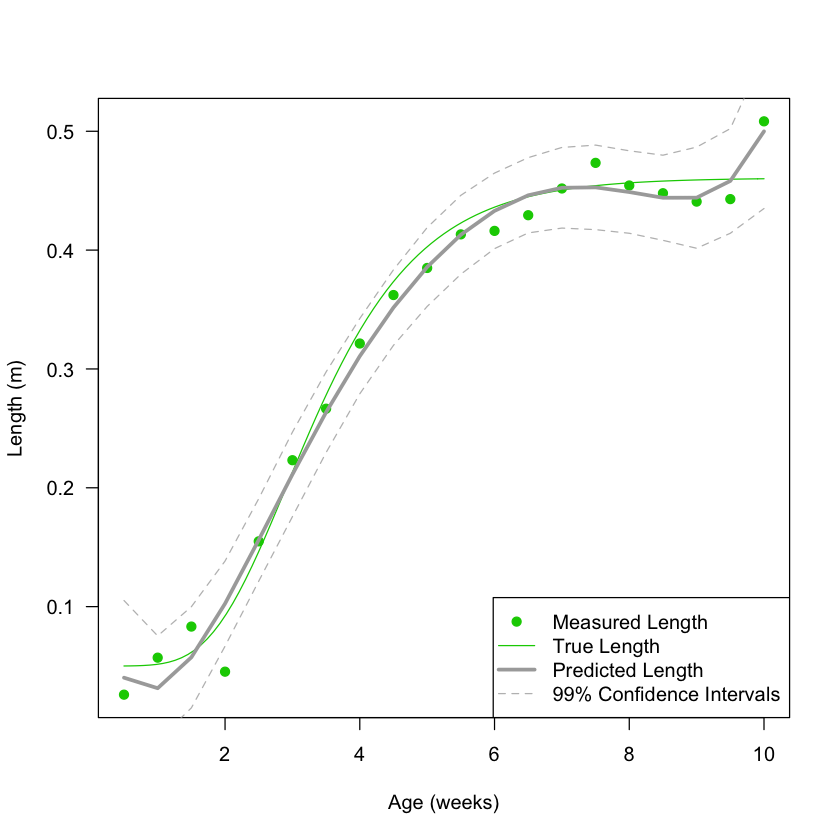

In [24]:

plot(y = RcticG1ind1, x = xvalues, main = NULL, ylab = "Length (m)", xlab = "Age (weeks)", las = 1, pch = 19, col = 3, type = "p")
curve(RcticG(Mono1akg[1,1], Mono1akg[1,2], Mono1akg[1,3], x), n = 101, add = TRUE, col = 3)
lines(inp,predicted.intervals[,1], col= "darkgrey", lwd=3)
lines(inp,predicted.intervals[,2], col = "grey", lwd=1, lty=2)
lines(inp,predicted.intervals[,3], col = "grey", lwd=1, lty=2)
legend("bottomright",c("Measured Length", "True Length", "Predicted Length", "99% Confidence Intervals"), col = c(3, 3, "darkgrey", "grey"), pch = c(19, NA, NA, NA), lwd = c(NA, 1, 3, 1), lty = c(1, 1, 1, 2))

This thick green line that represents our approximation seems, intuitively, to be a reasonable fit. But what if we how did we know to choose n=6? Did that arbitrary decision impact the model? Slide the toggle on the interactive chart below to see for yourself (see interactive figure).

In [46]:
sliderInput("numb", label = "Polynomial Degree", min = 1, max = 19, value = 1, step = 1, animate = T)

renderPlot({
  PolyModelPop1ind1 <- lm(RcticG1ind1 ~ poly(x = inp, n = input$numb))
  predicted.intervals <- predict(PolyModelPop1ind1, data.frame(x=inp), interval='confidence', level=0.99)
  
  plot(y = RcticG1ind1, x = xvalues, main = NULL, ylab = "Length (m)", xlab = "Age (weeks)", las = 1, pch = 19, col = 3)
  curve(RcticG(Mono1akg[1,1], Mono1akg[1,2], Mono1akg[1,3], x), n = 101, add = TRUE, col = 3)
  lines(inp,predicted.intervals[,1],col="darkgrey", lwd=3)
  lines(inp,predicted.intervals[,2],col="grey", lwd=1, lty=2)
  lines(inp,predicted.intervals[,3],col="grey", lwd=1, lty=2)
  legend("bottomright",c("Measured Length", "True Length", "Predicted Length", "99% Confidence Intervals"), col = c(3, 3, "darkgrey", "grey"), pch = c(1, NA, NA, NA), lwd = c(NA, 1, 3, 1), lty = c(1, 1, 1, 2))
})


<div class="form-group shiny-input-container">
  <label class="control-label" for="numb">Polynomial Degree</label>
  <input class="js-range-slider" id="numb" data-min="1" data-max="19" data-from="1" data-step="1" data-grid="true" data-grid-num="9" data-grid-snap="false" data-prettify-separator="," data-prettify-enabled="true" data-keyboard="true" data-keyboard-step="5.55555555555556" data-data-type="number"/>
  <div class="slider-animate-container">
    <a href="#" class="slider-animate-button" data-target-id="numb" data-interval="1000" data-loop="FALSE">
      <span class="play">
        <i class="glyphicon glyphicon-play"></i>
      </span>
      <span class="pause">
        <i class="glyphicon glyphicon-pause"></i>
      </span>
    </a>
  </div>
</div>

function (...) 
{
    if (length(outputArgs) != 0 && !hasExecuted$get()) {
        warning("Unused argument: outputArgs. The argument outputArgs is only ", 
            "meant to be used when embedding snippets of Shiny code in an ", 
            "R Markdown code chunk (using runtime: shiny). When running a ", 
            "full Shiny app, please set the output arguments directly in ", 
            "the corresponding output function of your UI code.")
        hasExecuted$set(TRUE)
    }
    if (is.null(formals(origRenderFunc))) 
        origRenderFunc()
    else origRenderFunc(...)
}
<environment: 0x7fe2054f4b80>
attr(,"class")
[1] "shiny.render.function" "function"             
attr(,"outputFunc")
function (outputId, width = "100%", height = "400px", click = NULL, 
    dblclick = NULL, hover = NULL, hoverDelay = NULL, hoverDelayType = NULL, 
    brush = NULL, clickId = NULL, hoverId = NULL, inline = FALSE) 
{
    res <- imageOutput(outputId, width, height, click, dblclick, 
        hover, hoverDelay, hoverDelayType, brush, clickId, hoverId, 
        inline)
    res$attribs$class <- "shiny-plot-output"
    res
}
<environment: namespace:shiny>
attr(,"outputArgs")
list()
attr(,"hasExecuted")
<Mutable>
  Public:
    clone: function (deep = FALSE) 
    get: function () 
    set: function (value) 
  Private:
    value: FALSE

Note what happpens when n = 19 (see interactive figure above). Bigger isn't always better. Here the approximate function has been overparametrized to the extreme and has lost all predictive value. The best-looking choices for n are between 4 and 6. This is consistent with the choices made in the literature (Griswold et al., 2008).

#### Under the Hood

Ok so now we've got a model, but what is R actually doing? Let's see what is in this mysterious object "`PolyModelPop1ind1`".

In [27]:
#Let's call our model to see what's inside.
PolyModelPop1ind1


Call:
lm(formula = RcticG1ind1 ~ poly(x = xvalues, n = 6))

Coefficients:
              (Intercept)  poly(x = xvalues, n = 6)1  
                 0.320155                   0.657213  
poly(x = xvalues, n = 6)2  poly(x = xvalues, n = 6)3  
                -0.228450                  -0.024841  
poly(x = xvalues, n = 6)4  poly(x = xvalues, n = 6)5  
                 0.106991                  -0.003975  
poly(x = xvalues, n = 6)6  
                 0.017492  


Evaluating `PolyModelPop1ind1` we see that it is composed of seven `Coefficients`.
Under the hood, R is adding together functions we told it to combine, namely, a costant, x, x^2^, x^3^, etc. up to x^6^. These `Coeffficients` correspond to the amplitudes of the functions making up the green curve shown in the figures above. In other words they tell us how much of each function is being added. Figure 7 is a visualization of the functions present when n = 6.

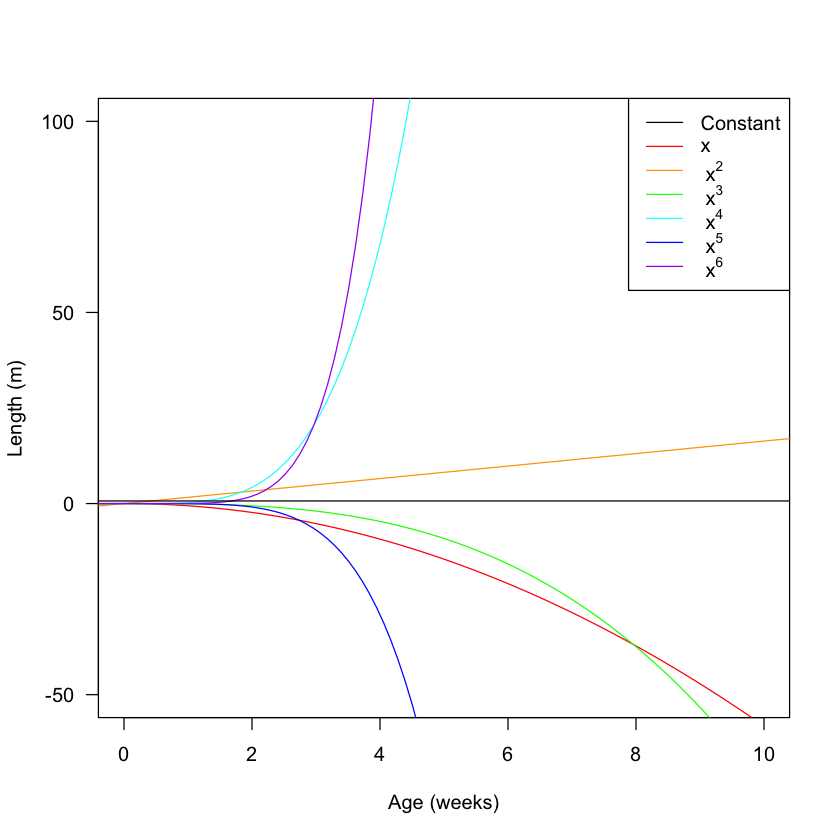

In [28]:
plot(1, type="n", xlim = c(0, 10), ylim = c(-50, 100), las = 1, ylab = "Length (m)", xlab = "Age (weeks)")
curve(1.63443*x, xlim = c(-1, 11), ylim = c(-55, 55), add = TRUE, col = "orange")
curve(-0.58209*x^2, to = 10, xlim = c(-1, 11), ylim = c(-55, 55), add = TRUE, col = 2)
curve(-0.07315*x^3, to = 10, xlim = c(-1, 11), ylim = c(-55, 55), add = TRUE, col = "green")
curve(0.26519*x^4, to = 10, xlim = c(-1, 11), ylim = c(-55, 55), add = TRUE, col = 5)
curve(-0.02839*x^5, to = 10, xlim = c(-1, 11), ylim = c(-55, 55), add = TRUE, col = 4)
curve(0.03007*x^6, to = 10, xlim = c(-1, 11), ylim = c(-55, 55), add = TRUE, col = "purple")
abline(h=0.67789,col= 1)
legend("topright", c("Constant", "x", as.expression(bquote( ~ x^2 ~ "")), as.expression(bquote( ~ x^3 ~ "")), as.expression(bquote( ~ x^4 ~ "")), as.expression(bquote( ~ x^5 ~ "")), as.expression(bquote( ~ x^6 ~ ""))), col = c( 1, 2, "orange", "green", 5, 4, "purple"), lty = c(1, 1, 1, 1, 1))

Many of these functions get very big, very quickly, when compared to the function that they add up to (which never exceeded y = 2) but when added together they make up a fair approximation of the length of `RcticG1ind1`.

### Analysis

Now that we have gotten R to approximate a model function, we are ready to broaden our scope from our friend 'RcticG1ind1' and consider the entire sample. By repeating the process outlined above for all of the samples of the lengths of fluvial R-ctic Grayling, we can collect a dataset of coefficients.

First, let's look at the data to see how it is organized.

In [29]:
#To start let's take a look at the data frame of the sample lengths.
#(The following line of code makes R report the structure of the object (RcticG1))
str(RcticG1, max.level = 0)

'data.frame':	10 obs. of  20 variables:


This tells us that we have a data frame of "10 observations of 20 variables" which in this case is "10 fish being measured 20 times each".

In [30]:
#Now, let's make an empty data frame for the coefficients.
#We know that we have measurements from 10 fish, and that each fish will have 7 coefficients approximating its growth curve (since we chose n = 6).
#Thus we need a 7 X 10 matrix, which we fill with NA's.
PolyModel1 <- data.frame(matrix(data=NA,nrow=7,ncol=10))

#Next, we can fill the empty data frame with the coefficients from the RcticG1 sample.
#This "for loop" repeats the command 10 times, first with l = 1, then with l = 2, etc.
#Each time the loop assigns a different element of the model "lm(as.matrix(RcticG1)" to the data frame "PolyModel1".
for (l in 1:10) {
  PolyModel1[l] <- coefficients(lm(as.matrix(RcticG1)[l,] ~ poly(x = xvalues, n = 6)))
}

#Let's take a look at what we've got by using the "str()" command again.
str(PolyModel1, max.level = 0)

'data.frame':	7 obs. of  10 variables:


Here we see that our data frame of coefficients is much more concise than the original data frame of lengths, but this does not mean that information is lost. 

(Note that the rows and colums have switched. Where X10 marked the 10th measurement in the data frame `RcticG1`, it now marks the 10th individual in `PolyModel1`).

Now let's run an analysis between this sample, and a sample of the adfluvial R-ctic Grayling (Figure 9). 

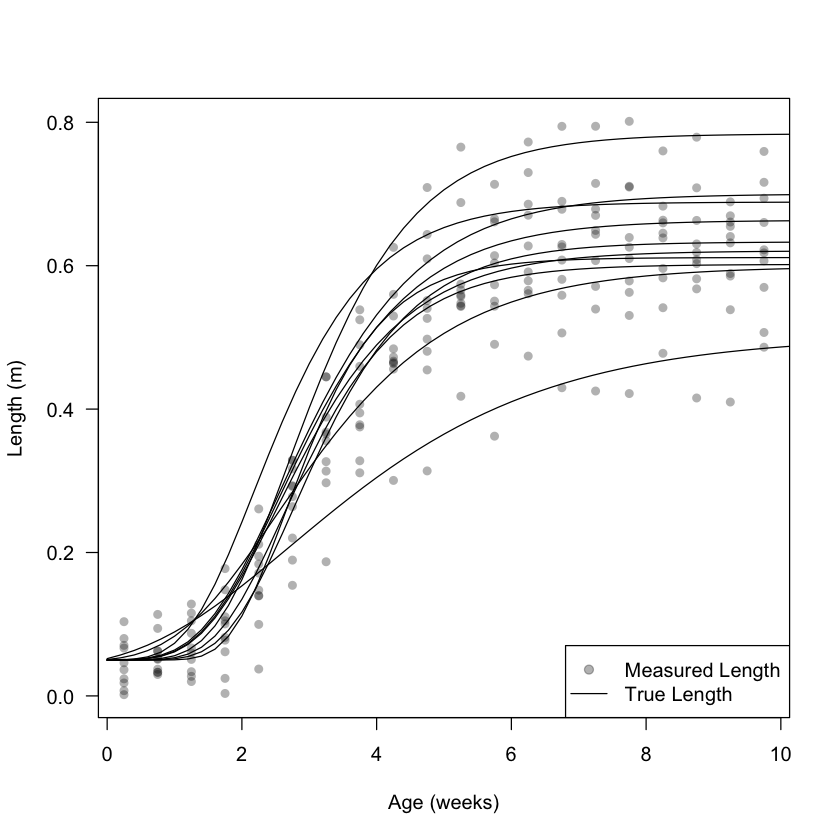

In [31]:
Mono1ind <- matrix(data=NA,nrow=10,ncol=20)

for (l in 1:10) {
  for (i in 1:20) {
    Mono1ind[l,i] <- RcticG1[l,i]
  }
}

a2 <- 1.4
k2 <- 1
g2 <- 2.6

#For reference:
#population 1:
#a1 <- 1
#k1 <- 1
#g1 <- 3

#Once again we need to build a data frame for our data
RcticG2 <- data.frame(matrix(NA, nrow=10, ncol=20))

#and one to keep track of what a, k, and g are for each individual in this population
Mono2akg <- data.frame(matrix(NA, nrow=10, ncol=3))


#Time to fill these frames
for (i in 1:10) {
  set.seed(1234*i)
  MonoError <- rnorm(n=20, mean=0, sd=0.04) #measurement error
  IndiDev <- rnorm(n=3, mean=0, sd=0.2) #individual deviation from population mean
  for (l in 1:20){
    RcticG2[i,l] <- RcticG(a2+IndiDev[1], k2+IndiDev[2], g2+IndiDev[3], ((l/2)-0.5)) + MonoError[l]
  }
  Mono2akg[i,1] <- a2+IndiDev[1]
  Mono2akg[i,2] <- k2+IndiDev[2]
  Mono2akg[i,3] <- g2+IndiDev[3]
}

xvalues2 <- seq(0.25, 9.75, 0.5)

matplot(y = t(RcticG2), x = xvalues2, type = 'p', lty = 1, pch = 16, main = NULL, ylab = "Length (m)", xlab = "Age (weeks)", las = 1, col = alpha("black", 0.3))
curve(RcticG(Mono2akg[1,1], Mono2akg[1,2], Mono2akg[1,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[2,1], Mono2akg[2,2], Mono2akg[2,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[3,1], Mono2akg[3,2], Mono2akg[3,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[4,1], Mono2akg[4,2], Mono2akg[4,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[5,1], Mono2akg[5,2], Mono2akg[5,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[6,1], Mono2akg[6,2], Mono2akg[6,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[7,1], Mono2akg[7,2], Mono2akg[7,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[8,1], Mono2akg[8,2], Mono2akg[8,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[9,1], Mono2akg[9,2], Mono2akg[9,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
curve(RcticG(Mono2akg[10,1], Mono2akg[10,2], Mono2akg[10,3], x), n = 101, add = TRUE, col = "black", xlim = c(0, 20))
legend("bottomright",c("Measured Length", "True Length"), 
       col = c(alpha("black", 0.3), "black"), pch = c(19, NA), lwd = c(NA, 1), lty = c(1, 1))

In [32]:
#Once again let's make an empty data frame for our coefficients,
PolyModel2 <- data.frame(matrix(data=NA,nrow=7,ncol=10))

#and fill the empty data frame with the coefficients from the RcticG2 sample.
for (l in 1:10) {
  PolyModel2[l] <- coefficients(lm(as.matrix(RcticG2)[l,] ~ poly(x = xvalues2, n = 6)))
}

#Let's check this to make sure it worked
str(PolyModel2, max.level = 0)

'data.frame':	7 obs. of  10 variables:


At this stage it is difficult to see intuitively whether or not these data frames of coefficients differ significantly. Fortunately, we don't need fancy function-valued tools at this point and can simply use t-test to compare our samples.
Now we are ready to run the test!

In [33]:
#t-test comparing the two data frames of polynomial model coefficients.
t.test(PolyModel1, PolyModel2)


	Welch Two Sample t-test

data:  PolyModel1 and PolyModel2
t = -0.6261, df = 126.85, p-value = 0.5324
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1520006  0.0789338
sample estimates:
mean of x mean of y 
0.1059321 0.1424655 


According to this result, with a p-value of 0.5888 we have failed to reject the null hypothesis that the sizes of fluvial and adfluvial populations of R-ctic Grayling differ significantly. 

Before we accept this result, let us plot these two samples together to see whether or not this is a reasonable outocome Figure 9.

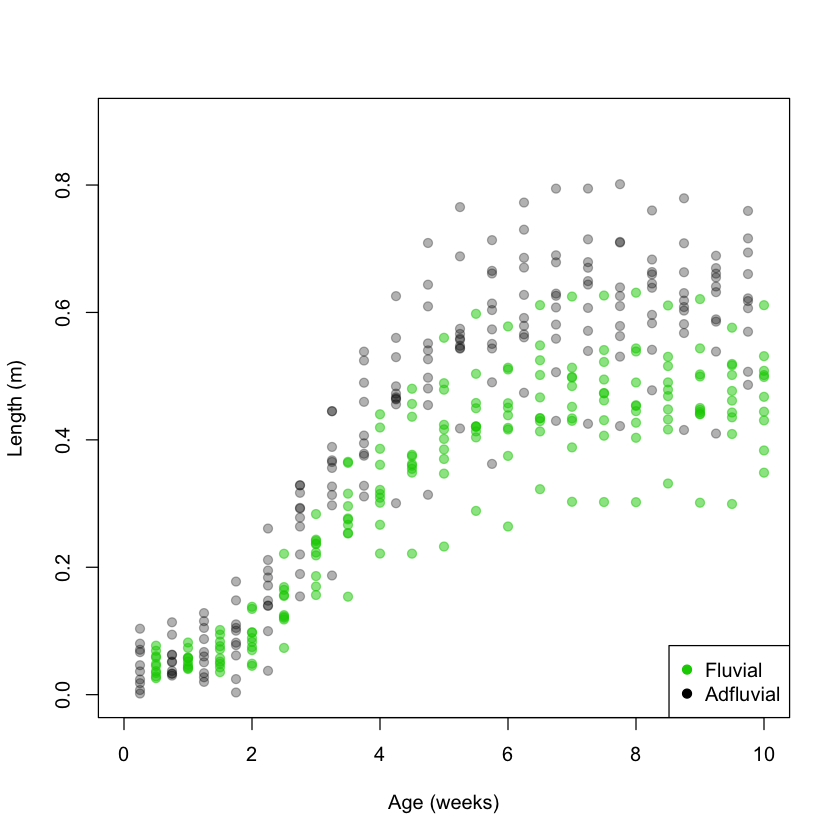

In [34]:
plot(0, type ='n',  ylab = "Length (m)", xlab = "Age (weeks)", ylim = c(0, 0.9), xlim = c(0, 10))

for (i in 1:length(RcticG1)) {
  points(y = RcticG1[i,], x = xvalues, lty = 1, pch = 19, las = 1, col = alpha(3, 0.5), xlim = c(0, 10))
}

for (i in 1:length(RcticG1)) {
  points(y = RcticG2[i,], x = xvalues2, lty = 1, pch = 19, las = 1, col = alpha("black", 0.3), xlim = c(0, 10))
}


legend("bottomright",c("Fluvial", "Adfluvial"), col = c(3, "black"), pch = c(19, 19))

There is a significant amount of overlap between these measurements of fluvial and adfluvial which supports our calculation that we cannot reject the null hypothesis.

#### Fitting a Sinusoidal Function to Data

Okay so we fit a polynomial to the data, but is that really the best fit? In Excel the user can choose from a selection of fits to suit their data. Let's not be outdone by a computer program! Here we will go beyond the capabilities of Excel and fit a sinusoidal model to the data.

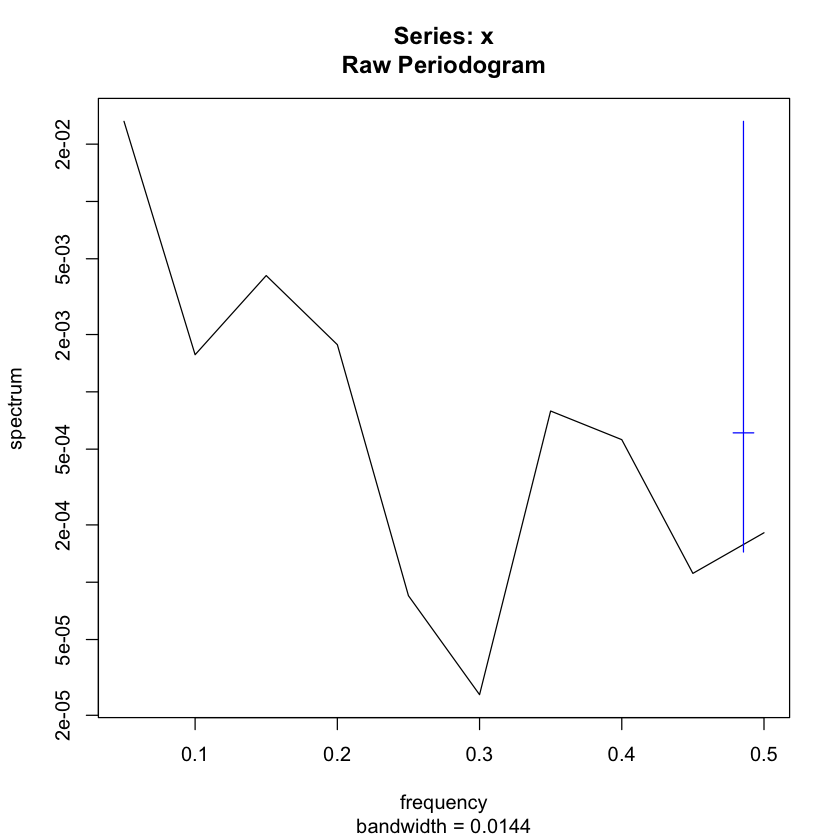

In [35]:
#To begin, we can use the function `spectrum` to get the spectral density of `RcticG1ind1`.
#This will tell us the prominence of various frequencie in the data. 
#If there are consistently peaks at a set interval, then the frequency of that pattern (1/(the period))  will feature prominently in this spectrum as an abundant frequency. 
#We want to know the distance between the peaks of the most prominent pattern in our data.

#To do that, we assign the "spectrum" of our data frame to an object.
spctrm <- spectrum(RcticG1ind1)

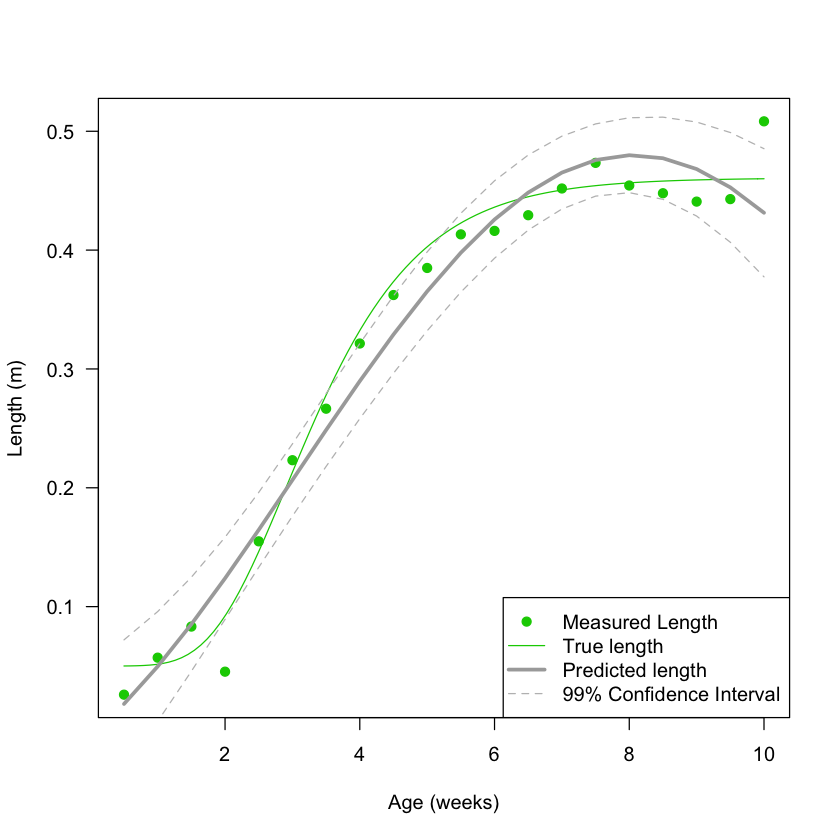

In [36]:
#Then we take the frequency ("$freq") that corresponds to the maximum ("max()") spectral density ($spec).
#We take 1/(frequency corresponding to maximum spectral density) in order to get the associated period.
period <- 1/spctrm$freq[spctrm$spec==max(spctrm$spec)]

#Now we're ready to make a model. 
#Even though we are now even further from our classical "linear" model than we were with the polynomial approximation, we are going to use the linear model function once again.
#Here, again we are inputting our y-values (RcticG1ind1), but this time we also have to specify the basis function by hand.
SinModelPop1ind1 <- lm(RcticG1ind1 ~ sin(2*pi/period*xvalues)+cos(2*pi/period*xvalues))

#If you find the mathematics of this basis function daunting, go to: https://www.desmos.com/calculator and copy this into the input window, adjusting the period, and changing between sin and cos as you see fit: \sin\left(\frac{\left(2\cdot\pi\right)}{period}\cdot x\right)

#As before, let's find the predicted intervals, and assign them to an object.
PredictedIntervalsSin <- predict(SinModelPop1ind1, data.frame(x = xvalues),interval='confidence', level=0.99)
#Now we're ready to plot our model. 
#Once again, we can start by plotting the data and true function as before.
plot(y = RcticG1ind1, x = xvalues, main = "", ylab = "Length (m)", xlab = "Age (weeks)", las = 1, pch = 19, col = 3)
#Then add the true underlying function.
curve(RcticG(Mono1akg[1,1], Mono1akg[1,2], Mono1akg[1,3], x), n = 101, add = TRUE, col = 3)

#Add the approximate function,
lines(fitted(SinModelPop1ind1)~xvalues, col="darkgrey", lwd=3)

#the 99% confidence intervals,
lines(xvalues, PredictedIntervalsSin[,2],col="grey", lwd=1, lty=2)
lines(xvalues, PredictedIntervalsSin[,3],col="grey", lwd=1, lty=2)

#and a legend.
legend("bottomright",c("Measured Length", "True length", "Predicted length", "99% Confidence Interval"), col = c(3, 3, "darkgrey", "grey"), pch = c(19, NA, NA, NA), lwd = c(NA, 1, 3, 1), lty = c(1, 1, 1, 2))

In Figure 10, we see that we do not have as good of a fit as we did in Figure 6. Our sinusoidal model is comparable to about a third order polynomial (n = 3). Let's see if we can improve the fit by adding a second harmonic (i.e. adding terms with double the frequency).

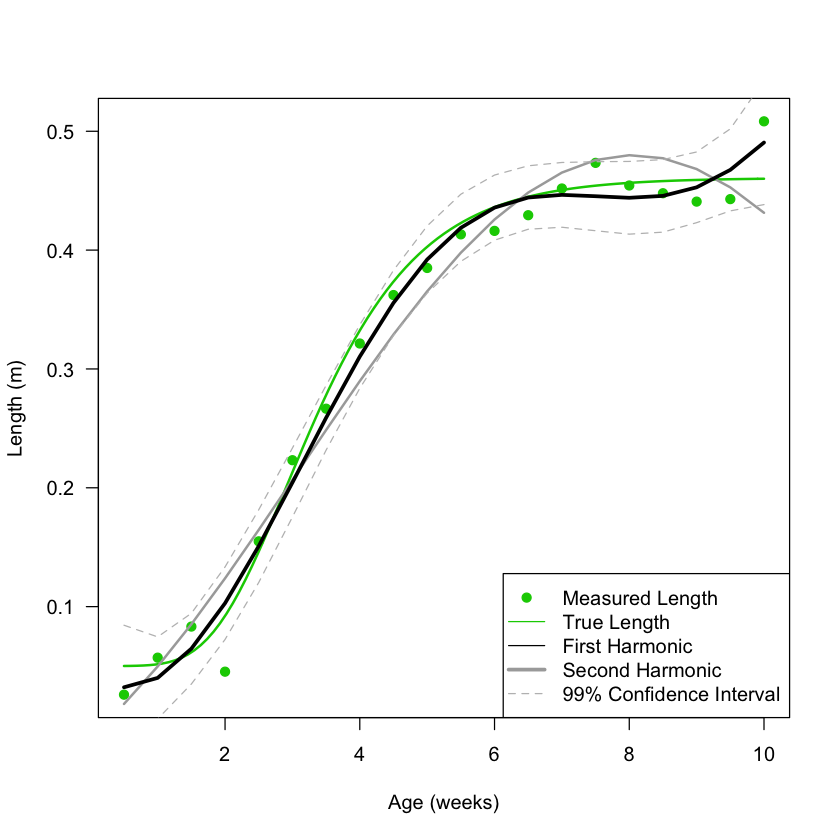

In [37]:
#The only difference here is that we have added another sine term, and another cosine term, each of which have been multiplied by two inside of the brackets.
SinModel2Pop1ind1 <- lm(RcticG1ind1 ~ sin(2*pi/period*xvalues)+cos(2*pi/period*xvalues)+sin(4*pi/period*xvalues)+cos(4*pi/period*xvalues))

#To gain an intuition for what this does to the function, return to https://www.desmos.com/calculator and copy the same expression into the input window, this time, try multiplying the expression within the "sin" or "cos" brackets and see what happens: \sin\left(\frac{\left(2\cdot\pi\right)}{period}\cdot x\right)

#Now again we find the predicted intervals, and assign them to an object.
PredictedIntervalsSin2 <- predict(SinModel2Pop1ind1, data.frame(x = xvalues),interval='confidence', level=0.99)

#Now let's plot this and see how our approximation improves.
#Start with the data.
plot(y = RcticG1ind1, x = xvalues, main = NULL, ylab = "Length (m)", xlab = "Age (weeks)", las = 1, pch = 19, col = 3)
#Add the true curve.
curve(RcticG(Mono1akg[1,1], Mono1akg[1,2], Mono1akg[1,3], x), n = 101, add = TRUE, col = 3, lwd = 2)
#Add the old approximation for comparison.
lines(fitted(SinModelPop1ind1)~xvalues, col="darkgrey", lwd=2)

#Add the new approximation.
lines(fitted(SinModel2Pop1ind1)~xvalues, col='black', lwd=3)
#Add the new confidence intervals.
lines(xvalues, PredictedIntervalsSin2[,2],col="grey", lwd=1, lty=2)
lines(xvalues, PredictedIntervalsSin2[,3],col="grey", lwd=1, lty=2)
#And finally add a legend.
legend("bottomright",c("Measured Length", "True Length", "First Harmonic", "Second Harmonic", "99% Confidence Interval"), col = c(3, 3, "black", "darkgrey", "grey"), pch = c(19, NA, NA, NA, NA), lwd = c(NA, 1, 1, 3, 1), lty = c(1, 1, 1, 1, 2))

Figure 11 demonstrates that adding the second harmonic greatly improved the fit. Having said this, a rigorous assesment of which basis function is best is beyond the scope of this introductory paper.


#### Under the Hood

Now just as we did with the polynomial regression we can evaluate this model and take a look at the inner workings.

In [38]:
#Let's call the model to take a look what it contains.
SinModel2Pop1ind1


Call:
lm(formula = RcticG1ind1 ~ sin(2 * pi/period * xvalues) + cos(2 * 
    pi/period * xvalues) + sin(4 * pi/period * xvalues) + cos(4 * 
    pi/period * xvalues))

Coefficients:
                 (Intercept)  sin(2 * pi/period * xvalues)  
                      0.4047                       -0.1508  
cos(2 * pi/period * xvalues)  sin(4 * pi/period * xvalues)  
                     -0.2239                        0.0111  
cos(4 * pi/period * xvalues)  
                     -0.1381  


Even though we are no longer dealing with polynomials, this call still returns `Coefficients`. Just as before these are the amplitudes of various functions making up the model.

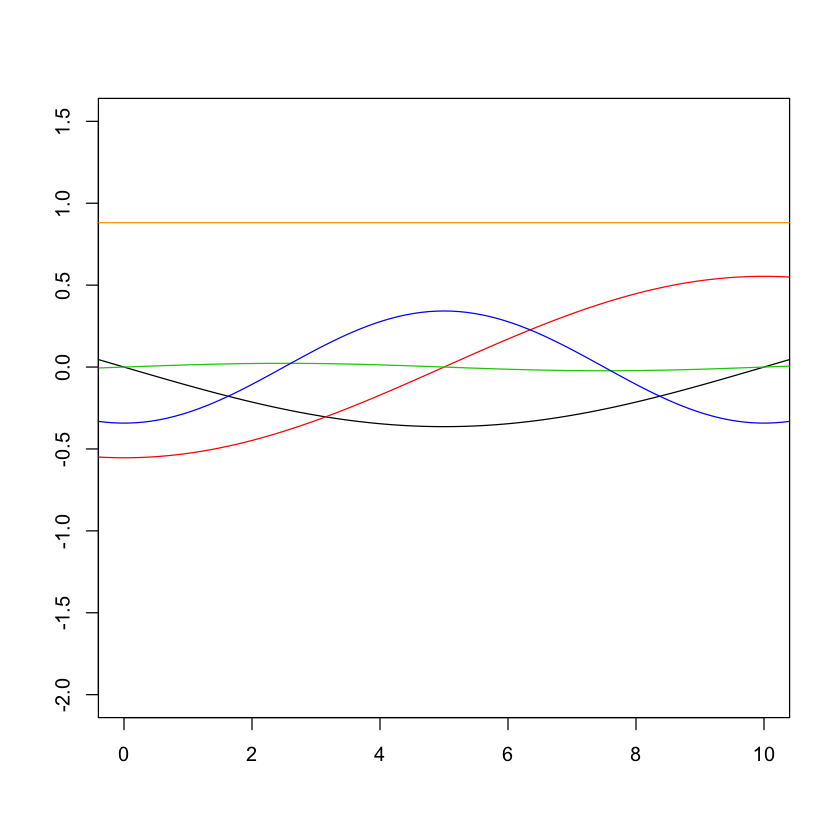

In [39]:
plot(1, type="n", xlab="", ylab="", xlim = c(0, 10), ylim = c(-2.0, 1.5))
curve(-0.3638*sin(2 * pi/period * x), xlim = c(-1, 11), ylim = c(-2, 2), add = TRUE, col = 1)
curve(-0.5538*cos(2 * pi/period * x), xlim = c(-1, 11), ylim = c(-2, 2), add = TRUE, col = 2)
curve(0.0227*sin(4 * pi/period * x), xlim = c(-1, 11), ylim = c(-2, 2), add = TRUE, col = 3)
curve(-0.3423 *cos(4 * pi/period * x), xlim = c(-1, 11), ylim = c(-2, 2), add = TRUE, col = 4)
abline(h=0.8813,col= "orange")


One major difference between sinusoidal functions and polynomials is that sinusoidal functions oscillate ad infinitum, whereas polynomials shoot off to infinity in one way or another (assuming non-zero coefficients). This may be a useful point to consider when selecting a basis function. Having said that, we have just seen that both functions were able to reach visually similar levels of approximation. In fact there is little need to fret about selecting the "correct" basis function. After completing 3,000 analyses like that above, Griswolold et al. wrote, "even for basic questions about differences in mean functions, the function-valued approach never has lower, and often has substantially better, power than the multivariate approach." So don't worry about picking the perfect basis function, or exactly the right number of terms in your basis function. Treating traits as functions is just another way to ask and answer questions so don't be afraid to try it out.


## Going Further
### "Okay so What Now?"
In this paper, we have focused on one type of function-valued analysis, a non-parametric approach (meaning we did not assume the underlying function dictating the data) of fitting a basis function to data. We chose this approach because Griswold et al. showed that even when the correct underlying function was known, a parametric analysis fitting the curve that was used to produce the data to the data did not always have better power than the non-parametric approach (Griswold et al., 2008). Other methods include a parametric approach, which involves assuming an underlying function and estimating the parameters of that function (Hernandez et al., 2015). For example, one might assume that data fits a Gaussian function and take the mean and standard deviation as parameters (here "standard deviation" refers to the width of the bell approximating the data, not the standard deviation of the data). These parameters can then be compared to each other as data, just as the coefficients of basis functions can be compared in non-parametric function-valued analysis. While most function-valued analyses will inevitably take on one of these three forms, readers are encouraged to be creative in applying these methods. The curious reader is encouraged to consult the list of references to further explore function-valued traits. This field holds many new techniques to be developed, fine-tuned, and implemented so dive in and be part of this wave of innovation.

## Activities
### Exercises:
1. Manipulate the following function, adding/removing terms, changing coefficients etc. and plot the results to gain an intuition for polynomials.

In [40]:
polynomial <- function(x) {
  0 + x + 2*x^2 + 3*x^3 +4*x^4 +5*x^5 + 6*x^6
}

### Practice Problems:
1. a) Open the sample dataset CatTemp1.csv representing the growth rate of Freija Fritillary caterpillars as a function of temperature and write a program that fits a polynomial to the data. (Growth rate (mg day^–1^))
      b) Use your program to fit a polynomial to the data in CatTemp2.csv representing the growth rate of the Stella Orange Tip as a function of temperature and compare these populations using multivariate and function-valued methods.
      c) Plot the data of both populations, and their polynomial approximations on the same graph. Does it look like there ought to be a 
    d) TroubleShooting: Iport the data into Excel and use the plotting function to fit a polynomial of bestfit to the data. Do Excel's coefficients match those you found in R?
    
2. Ever wondered if plankton activity is impacted by the weather? Determine whether or not there is a significant difference in phytoplankton depth on sunny and cloudy days:
PlanktonDepthSun.csv
PlanktonDepthCloud.csv

## Works Cited

Baker, R. L., Leong, W. F., Brock, M. T., Markelz, R. J. C., Covington, M. F., Devisetty, U. K., … Weinig, C. (2015). Modeling development and quantitative trait mapping reveal independent genetic modules for leaf size and shape. The New Phytologist, 208(1), 257–268. https://doi.org/10.1111/nph.13509

Griswold, C. K., Gomulkiewicz, R., & Heckman, N. (2008). Hypothesis Testing in Comparative and Experimental Studies of Function-Valued Traits. Evolution, 62(5), 1229–1242. https://doi.org/10.1111/j.1558-5646.2008.00340.x

Hernandez, K. M. (2015), Understanding the genetic architecture of complex traits using the function-valued approach. New Phytol, 208: 1–3. doi:10.1111/nph.13607

Kirkpatrick, M., & Lofsvold, D. (1989). The evolution of growth trajectories and other complex quantitative characters. Genome, 31(2), 778–783. https://doi.org/10.1139/g89-137

Pletcher, S. D., & Geyer, C. J. (1999). The Genetic Analysis of Age-Dependent Traits: Modeling the Character Process. Genetics, 153(2), 825–835.

Stinchcombe, J. R. et al., (2012). Genetics and evolution of function-valued traits: understanding environmentally responsive phenotypes. Trends in Ecology & Evolution, 27(11), 637–647. https://doi.org/10.1016/j.tree.2012.07.002

Veen, T., Brock, C., Rennison, D., & Bolnick, D. (2017). Plasticity contributes to a fine-scale depth gradient in sticklebacks’ visual system. Molecular Ecology, 26(16), 4339–4350. https://doi.org/10.1111/mec.14193


## Acknowledgements

I would like to thank:
the Research, Scholarship, and Creative Works (RSCW) Committee for supporting this research through a Winter Fellowship,
My mentor Thor Veen for providing direction and insight,
Sander van Doorn for bringing clarity.








